# Data Entry

In [ ]:
vonfery={
    "1":1.65,
    "2":2.36,
    "3":2.44,
    "4":2.83,
    "5":3.22,
    "6":3.61,
    "7":3.84,
    "8":4.08,
    "9":4.17,
    
    "a":4.31,
    "b":4.56,
    "c":4.74,
    "d":4.93,
    "e":5.07,
    "f":5.18,
    "g":5.46,
    "h":5.88,
    "i":6.10,
    "j":6.45,
    "k":6.65
}

In [ ]:
size_to_force={
    1.65:0.008,
    2.36:0.02,
    2.44:0.04,
    2.83:0.07,
    3.22:0.16,
    3.61:0.4,
    3.84:0.6,
    4.08:1,
    4.17:1.4,
    4.31:2,
    4.56:4,
    4.74:6,
    4.93:8,
    5.07:10,
    5.18:15,
    5.46:26,
    5.88:60,
    6.10:100,
    6.45:180,
    6.65:300
}

In [3]:
result = []
while True:
    input_string = input("plz enter the result, left blank to quit")
    if input_string:
        result.append([vonfery[i] for i in input_string])
        continue
    break

plz enter the result, left blank to quit 


# Analysis
<font size=5>vonfery 患者前测对健康人、后测对健康人、前后测对比的均值比较； 前测vonfery与行为评分、vbm、tbss结果之间的相关性分析</font>

In [4]:
from setup import general
from setup import stat
from setup import r

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
from pingouin import ancova # anconva
from pingouin import multivariate_normality # for pearson correlation
from rpy2 import robjects

In [5]:
%store -r pt_sens pt_pain pt1_sens pt1_pain ct_sens ct_pain nreps 

## Control & Pt1
缺失数据用均值填充

In [ ]:
general.fill_na_mean(pt_sens)
general.fill_na_mean(pt_pain)
general.fill_na_mean(pt1_sens)
general.fill_na_mean(pt1_pain)

In [6]:
regions = ct_pain.columns[-4:]
qst_result_sens = []
for region in regions:
    lev = stats.levene(ct_sens[region], pt_sens[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(ct_sens[region], pt_sens[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(ct_sens, 'hc', region), r.to_csv_r(pt_sens, 'pt', region), 3 + len(region), nreps=nreps)
    
    qst_result_sens.append(stats.shapiro(ct_sens[region])+stats.shapiro(pt_sens[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
                           
qst_result_sens_df = pd.DataFrame(qst_result_sens, index=regions, columns=['hc_norm_stat','hc_norm_p', 'pt_norm_stat',
                                                                                         'pt_norm_p','levene_stat', 'levene_p','ind_t','ind_t_p', 'perm_p'])

In [7]:
print("感觉")
c1 = general.create_final_table(qst_result_sens_df,ct_sens, pt_sens, columns=['control','patient'],aconva=False)
c1

感觉


,control,patient,t value,p value
c6,0.26 ± 0.44,0.22 ± 0.25,0.91,0.77110
c7,0.36 ± 0.78,0.32 ± 0.32,0.73,0.86144
c8,0.17 ± 0.15,0.19 ± 0.2,0.52,0.74694
head,0.04 ± 0.06,0.04 ± 0.03,0.24,0.99397


In [8]:
qst_result_pain = []
for region in regions:

    lev = stats.levene(ct_pain[region], pt_pain[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(ct_pain[region], pt_pain[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(ct_pain, 'hc', region), r.to_csv_r(pt_pain, 'pt', region), 3 + len(region), nreps=nreps)
    
    qst_result_pain.append(stats.shapiro(ct_pain[region])+stats.shapiro(pt_pain[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
qst_result_pain_df = pd.DataFrame(qst_result_pain, index=regions, columns=['hc_norm_stat','hc_norm_p', 'pt_norm_stat','pt_norm_p','levene_stat',
                                                                                         'levene_p','ind_t','ind_t_p', 'perm_p'])

In [9]:
print("痛觉")
c2 = general.create_final_table(qst_result_pain_df,ct_pain, pt_pain, columns=['control','patient'],aconva=False)
c2

痛觉


,control,patient,t value,p value
c6,76.68 ± 111.03,30.84 ± 75.75,0.20,0.18862
c7,76.97 ± 111.54,7.85 ± 5.41,0.01,0.02127
c8,76.39 ± 110.66,16.41 ± 18.59,0.05,0.04722
head,29.17 ± 31.38,16.51 ± 0.89,0.00,0.11577


**Summary：** 
* head 数据缺失较多。
* 患者损伤后痛阈限下降。c7,c8 节段统计显著

## Comparasion pt1 & pt2

In [11]:
qst_result_sens1 = []
for region in regions:

    lev = stats.levene(pt_sens[region], pt1_sens[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(pt_sens[region], pt1_sens[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(pt_sens, 'pt', region), r.to_csv_r(pt1_sens, 'pt1', region), 3 + len(region), nreps=nreps)
    
    qst_result_sens1.append(stats.shapiro(pt_sens[region])+stats.shapiro(pt1_sens[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
qst_result_sens_df1 = pd.DataFrame(qst_result_sens1, index=regions, columns=['pt_norm_stat','pt_norm_p', 'pt1_norm_stat','pt1_norm_p','levene_stat',
                                                                                         'levene_p','ind_t','ind_t_p', 'perm_p'])
print("感觉阈")
qst_result_sens_df1

感觉阈


,pt_norm_stat,pt_norm_p,pt1_norm_stat,pt1_norm_p,levene_stat,levene_p,ind_t,ind_t_p,perm_p
c6,0.808912,0.003585,0.786763,0.001827,1.712904,0.200547,0.69685,0.49126,0.4978
c7,0.823095,0.005612,0.940487,0.355020,0.006275,0.937387,-0.58858,0.56055,0.5708
c8,0.833158,0.007775,0.820016,0.005087,0.205335,0.653709,0.30262,0.76427,0.7692
head,0.601037,0.000017,0.603706,0.000018,2.336201,0.136874,1.37254,0.18007,0.1550


In [12]:
print("感觉阈")
a1 = general.create_paired_table(qst_result_sens_df1, pt_sens, pt1_sens, columns=['前测','后测'])
a1

感觉阈


,前测,后测,t value,p value
c6,0.22 ± 0.25,0.17 ± 0.16,0.70,0.4978
c7,0.32 ± 0.32,0.39 ± 0.28,-0.59,0.5708
c8,0.19 ± 0.2,0.17 ± 0.17,0.30,0.7692
head,0.04 ± 0.03,0.03 ± 0.01,1.37,0.1550


In [13]:
qst_result_pain1 = []
for region in regions:

    lev = stats.levene(pt_pain[region], pt1_pain[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(pt_pain[region], pt1_pain[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(pt_pain, 'hc', region), r.to_csv_r(pt1_pain, 'pt', region), 3 + len(region), nreps=nreps)
    
    qst_result_pain1.append(stats.shapiro(pt_pain[region])+stats.shapiro(pt1_pain[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
qst_result_pain_df1 = pd.DataFrame(qst_result_pain1, index=regions, columns=['hc_norm_stat','hc_norm_p', 'pt_norm_stat','pt_norm_p','levene_stat',
                                                                                         'levene_p','ind_t','ind_t_p', 'perm_p'])
print("痛觉阈")
qst_result_pain_df1

痛觉阈


,hc_norm_stat,hc_norm_p,pt_norm_stat,pt_norm_p,levene_stat,levene_p,ind_t,ind_t_p,perm_p
c6,0.417759,8.181818e-07,0.528879,0.000006,0.414927,0.524722,-0.64680,0.52303,0.5128
c7,0.788570,2.632487e-03,0.556611,0.000010,3.719947,0.063960,-1.80580,0.08171,0.0070
c8,0.798992,3.568475e-03,0.825080,0.007858,0.601558,0.444486,0.68061,0.50171,0.5228
head,0.732807,5.703536e-04,0.587555,0.000020,1.379390,0.250097,8.39574,0.00000,0.0000


In [14]:
qst_result_pain1 = []
for region in regions:

    lev = stats.levene(pt_pain[region], pt1_pain[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(pt_pain[region], pt1_pain[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(pt_pain, 'pt', region), r.to_csv_r(pt1_pain, 'pt1', region), 3 + len(region), nreps=nreps)
    
    qst_result_pain1.append(stats.shapiro(pt_pain[region])+stats.shapiro(pt1_pain[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
qst_result_pain_df1 = pd.DataFrame(qst_result_pain1, index=regions, columns=['pt_norm_stat','pt_norm_p', 'pt1_norm_stat','pt1_norm_p','levene_stat',
                                                                                         'levene_p','ind_t','ind_t_p', 'perm_p'])

In [15]:
print("痛觉阈")
a2 = general.create_paired_table(qst_result_pain_df1, pt_pain, pt1_pain, columns=['前测','后测'])
a2

痛觉阈


,前测,后测,t value,p value
c6,30.84 ± 75.75,52.18 ± 102.86,-0.65,0.5128
c7,7.85 ± 5.41,43.08 ± 75.38,-1.81,0.0070
c8,16.41 ± 18.59,12.41 ± 13.2,0.68,0.5228
head,16.51 ± 0.89,8.95 ± 3.37,8.40,0.0000


# hc & pt2

In [16]:
qst_result_sens2 = []
for region in regions:

    lev = stats.levene(ct_sens[region], pt1_sens[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(ct_sens[region], pt1_sens[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(ct_sens, 'ct', region), r.to_csv_r(pt1_sens, 'pt1', region), 3 + len(region), nreps=nreps)
    
    qst_result_sens2.append(stats.shapiro(ct_sens[region])+stats.shapiro(pt1_sens[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
qst_result_sens_df2 = pd.DataFrame(qst_result_sens2, index=regions, columns=['ct_norm_stat','ct_norm_p', 'pt1_norm_stat','pt1_norm_p','levene_stat',
                                                                                         'levene_p','ind_t','ind_t_p', 'perm_p'])
print("感觉阈")
qst_result_sens_df2

感觉阈


,ct_norm_stat,ct_norm_p,pt1_norm_stat,pt1_norm_p,levene_stat,levene_p,ind_t,ind_t_p,perm_p
c6,0.489408,1.054477e-06,0.786763,0.001827,0.649876,0.426298,0.76320,0.45111,0.6386
c7,0.412551,2.552675e-07,0.940487,0.355020,0.105792,0.747172,-0.12375,0.90231,0.9726
c8,0.806861,2.523151e-03,0.820016,0.005087,0.038171,0.846375,-0.00206,0.99837,0.9984
head,0.609107,1.276953e-05,0.603706,0.000018,3.904484,0.057115,0.64079,0.52637,0.6644


In [17]:
print("痛觉")
b1 = general.create_final_table(qst_result_sens_df2,ct_sens, pt1_sens, columns=['control','后测'],aconva=False)
b1

痛觉


,control,后测,t value,p value
c6,0.26 ± 0.44,0.17 ± 0.16,0.43,0.45111
c7,0.36 ± 0.78,0.39 ± 0.28,0.75,0.90231
c8,0.17 ± 0.15,0.17 ± 0.17,0.85,0.99837
head,0.04 ± 0.06,0.03 ± 0.01,0.06,0.52637


In [18]:
qst_result_pain2 = []
for region in regions:

    lev = stats.levene(ct_pain[region], pt1_pain[region])
    equal_var = True if lev[1]>0.05 else False
    t_result = stats.ttest_ind(ct_pain[region], pt1_pain[region], equal_var=equal_var)
    
    perm_ind_t_p = robjects.r['perm_ind_t'](r.to_csv_r(ct_pain, 'ct', region), r.to_csv_r(pt1_pain, 'pt1', region), 3 + len(region), nreps=nreps)
    
    qst_result_pain2.append(stats.shapiro(ct_pain[region])+stats.shapiro(pt1_pain[region])+lev+tuple([round(t_result[0],5),round(t_result[1],5),perm_ind_t_p[0]]))
qst_result_pain_df2 = pd.DataFrame(qst_result_pain2, index=regions, columns=['ct_norm_stat','ct_norm_p', 'pt1_norm_stat','pt1_norm_p','levene_stat',
                                                                                         'levene_p','ind_t','ind_t_p', 'perm_p'])
print("感觉阈")
qst_result_pain_df2

感觉阈


,ct_norm_stat,ct_norm_p,pt1_norm_stat,pt1_norm_p,levene_stat,levene_p,ind_t,ind_t_p,perm_p
c6,0.672401,0.000057,0.528879,0.000006,0.355120,0.555699,0.64474,0.52399,0.5032
c7,0.671609,0.000056,0.556611,0.000010,1.078223,0.307393,0.99264,0.32882,0.3486
c8,0.662870,0.000045,0.825080,0.007858,4.764617,0.037011,2.36474,0.03058,0.0230
head,0.805274,0.002398,0.587555,0.000020,13.688122,0.000865,2.63963,0.01757,0.0152


In [19]:
print("痛觉")
b2 = general.create_final_table(qst_result_pain_df2,ct_pain, pt1_pain, columns=['control','后测'],aconva=False)
b2

痛觉


,control,后测,t value,p value
c6,76.68 ± 111.03,52.18 ± 102.86,0.56,0.52399
c7,76.97 ± 111.54,43.08 ± 75.38,0.31,0.32882
c8,76.39 ± 110.66,12.41 ± 13.2,0.04,0.03058
head,29.17 ± 31.38,8.95 ± 3.37,0.00,0.01757


# Correlation

In [45]:
%store -r Scale_Filtered pt_sens pt_pain pt1_sens pt1_pain ct_sens ct_pain nreps 

In [46]:
scale_pt = Scale_Filtered[Scale_Filtered['timepoint'].isin([1])]
corr = pt_sens.join(scale_pt).drop(['Type', 'tp', 'position', 'timepoint'], axis=1)
corr

,c6,c7,c8,head,SFMPQ,PDQ,PSQ,BDI,TAI,PSQI,...,LOT_R,NEO_1,NEO_2,NEO_3,NEO_4,NEO_5,SAI,VAS,HAMA,HAMD
ID,,,,,,,,,,,,,,,,,,,,,
P_003,0.550000,1.225000,NaN,NaN,96.0,19.0,41.0,4.0,31.0,4.0,...,26.0,20.0,45.0,36.0,37.0,47.0,22.0,50.0,17.0,24.0
P_004,0.553750,NaN,0.092500,NaN,150.0,34.0,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.0,100.0,NaN,NaN
P_006,0.025667,NaN,0.063333,NaN,11.0,3.0,53.0,3.0,27.0,2.0,...,24.0,NaN,NaN,NaN,NaN,NaN,22.0,10.0,4.0,7.0
P_007,0.201667,NaN,0.124000,NaN,111.0,21.0,NaN,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,60.0,23.0,13.0
P_007,0.145000,NaN,0.110000,NaN,111.0,21.0,NaN,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,60.0,23.0,13.0
P_014,0.016800,0.014000,0.022667,NaN,85.0,15.0,92.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,80.0,9.0,9.0
P_015,0.027667,0.044667,0.017333,NaN,78.0,13.0,53.0,7.0,34.0,6.0,...,19.0,28.0,30.0,36.0,42.0,46.0,NaN,85.0,4.0,2.0
P_016,0.035500,0.014000,0.010400,NaN,94.0,22.0,129.0,3.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,80.0,3.0,4.0
P_017,0.008000,0.433750,0.282500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


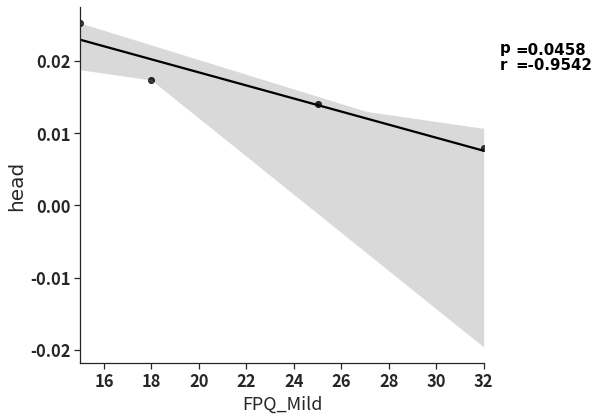

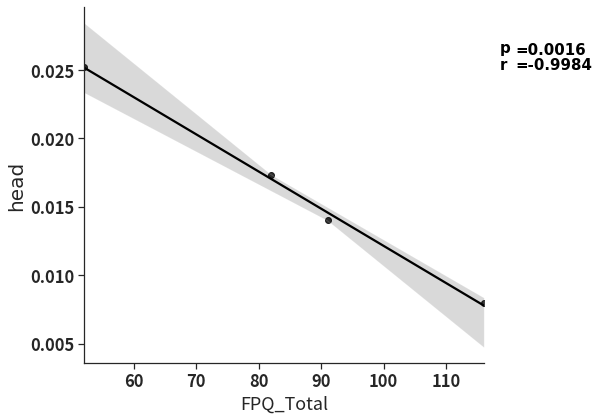

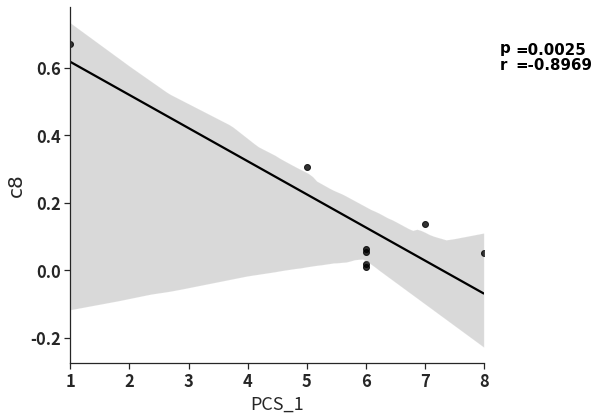

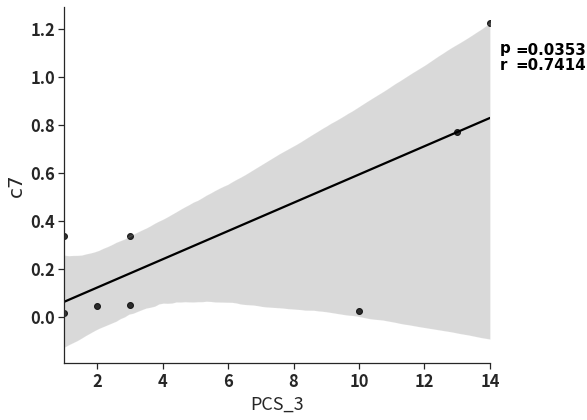

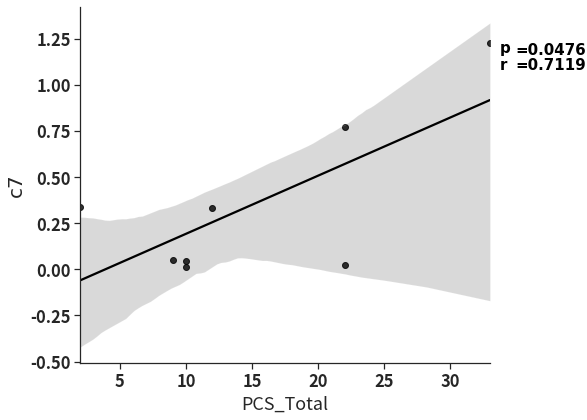

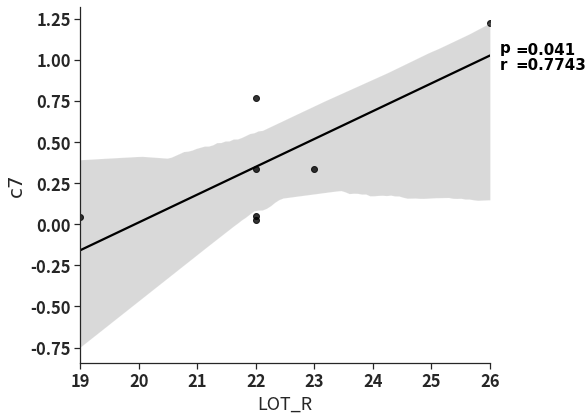

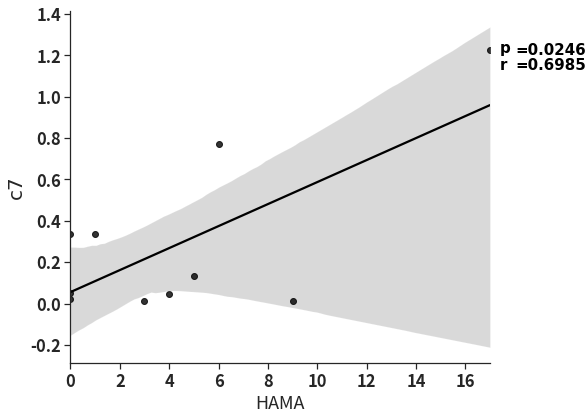

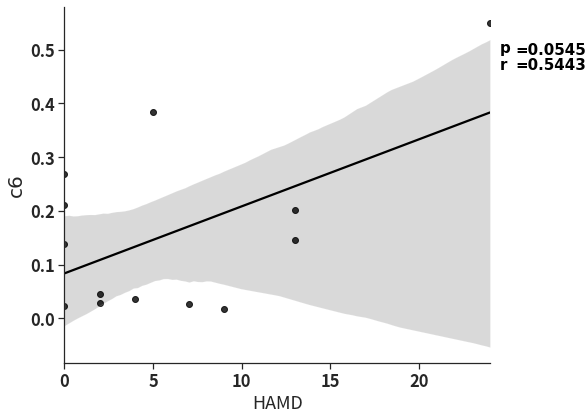

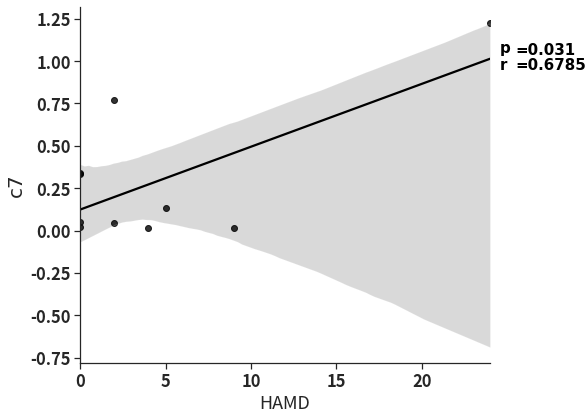

感觉阈值
p value of pearson correlation test:


,SFMPQ,PDQ,PSQ,BDI,TAI,PSQI,FPQ_Severe,FPQ_Mild,FPQ_Medical,FPQ_Total,...,LOT_R,NEO_1,NEO_2,NEO_3,NEO_4,NEO_5,SAI,VAS,HAMA,HAMD
c6,0.0932,0.4204,0.5906,0.2550,0.4512,0.4843,0.4923,0.6921,0.3423,0.4577,...,0.0821,0.4817,0.5013,0.7373,0.4402,0.3749,0.4620,0.6937,0.3064,0.0545
c7,0.2775,0.3302,0.4280,0.4699,0.7899,0.5473,0.3462,0.9350,0.8217,0.7341,...,0.0410,0.6952,0.5520,0.7574,0.4904,0.5341,0.1140,0.6513,0.0246,0.0310
c8,0.4815,0.4017,0.6074,0.8641,0.6975,0.7474,0.6266,0.5624,0.2868,0.4601,...,0.9007,0.3549,0.3624,0.5178,0.2341,0.9856,0.6538,0.1238,0.5669,0.4184
head,0.0815,0.3166,0.0707,0.5071,0.3610,0.2451,0.1405,0.0458,0.1244,0.0016,...,0.3635,0.2989,0.4113,0.6322,0.5179,0.5179,0.3739,0.4357,0.1374,0.4701


In [47]:
qst_list = corr.columns[:4]
scale_list = list(corr.columns[4:])
rows = len(qst_list)
cols = len(scale_list)
# Patients' correlation matrix
qst_coefficient_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols),  index=qst_list,columns=scale_list)
qst_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=qst_list,columns=scale_list)
qst_p_matrix_perm = qst_p_matrix.copy()
qst_norm_matrix = qst_p_matrix.copy()


for scale in scale_list:
    x_label = scale
    for y_label in qst_list:

        df = corr[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) # drop any row with missing value to prevent overfit

        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        qst_norm_matrix.loc[y_label, x_label] = norm_bool

        pccs = stats.pearsonr(df[x_label], df[y_label])
        qst_coefficient_matrix.loc[y_label, x_label] = round(pccs[0],4)
        qst_p_matrix.loc[y_label, x_label] = round(pccs[1],4)

        if pccs[1] < 0.06:

            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=1.5)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            font2 = {'weight' : 'normal','size'   : 20, }
            
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            plt.ylabel('{}'.format(y_label),font=font2)
            plt.annotate("p\nr", xy=(500, 350), xycoords='figure points',fontsize=15,color="black")

            plt.annotate("={}".format(round(qst_p_matrix.loc[y_label, x_label],4)), 
            xy=(515, 365), xycoords='figure points',fontsize=15,color="black")
            plt.annotate("={}".format(qst_coefficient_matrix.loc[y_label, x_label]), 
            xy=(515, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tight_layout()
            plt.savefig('chart/qst_{}_{}一元线性回归.svg'.format(x_label, y_label))
            plt.show()
print( "感觉阈值")
print("p value of pearson correlation test:")
qst_p_matrix

In [23]:
scale_pt = Scale_Filtered[Scale_Filtered['timepoint'].isin([1])]
corr = pt_pain.join(scale_pt).drop(['Type', 'tp', 'position', 'timepoint'], axis=1)
corr

,c6,c7,c8,head,SFMPQ,PDQ,PSQ,BDI,TAI,PSQI,...,LOT_R,NEO_1,NEO_2,NEO_3,NEO_4,NEO_5,SAI,VAS,HAMA,HAMD
ID,,,,,,,,,,,,,,,,,,,,,
P_004,1.050000,7.850000,5.500000,16.5100,150.0,34.0,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,70.0,100.0,NaN,NaN
P_006,9.000000,7.850000,8.666667,16.5100,11.0,3.0,53.0,3.0,27.0,2.0,...,24.0,NaN,NaN,NaN,NaN,NaN,22.0,10.0,4.0,7.0
P_007,6.333333,7.850000,6.566667,16.5100,111.0,21.0,NaN,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,60.0,23.0,13.0
P_007,1.166667,7.850000,2.400000,16.5100,111.0,21.0,NaN,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,60.0,23.0,13.0
P_014,8.500000,2.633333,2.300000,16.5100,85.0,15.0,92.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,80.0,9.0,9.0
P_015,6.000000,2.300000,2.300000,16.5100,78.0,13.0,53.0,7.0,34.0,6.0,...,19.0,28.0,30.0,36.0,42.0,46.0,NaN,85.0,4.0,2.0
P_016,9.333333,5.000000,3.000000,16.5100,94.0,22.0,129.0,3.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,43.0,80.0,3.0,4.0
P_017,2.828571,7.850000,16.410000,16.5100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_018,15.125000,11.250000,29.750000,16.5100,36.0,10.0,24.0,3.0,31.0,7.0,...,22.0,16.0,51.0,37.0,58.0,54.0,24.0,10.0,1.0,0.0


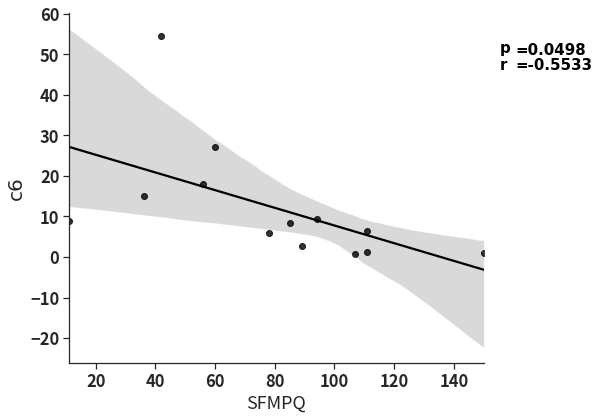

痛觉阈值
p value of pearson correlation test:


,SFMPQ,PDQ,PSQ,BDI,TAI,PSQI,FPQ_Severe,FPQ_Mild,FPQ_Medical,FPQ_Total,...,LOT_R,NEO_1,NEO_2,NEO_3,NEO_4,NEO_5,SAI,VAS,HAMA,HAMD
c6,0.0498,0.7449,0.3350,0.0887,0.9448,0.2800,0.3789,0.1844,0.4414,0.2993,...,0.8160,0.6270,0.7278,0.4588,0.9273,0.3523,0.1497,0.2145,0.1075,0.0805
c7,0.4021,0.5875,0.6710,0.6240,0.1248,0.4684,0.9762,0.2597,0.2053,0.4793,...,0.6111,0.7035,0.7072,0.6820,0.9835,0.9700,0.9736,0.1108,0.5444,0.4989
c8,0.1003,0.5587,0.4902,0.3446,0.9552,0.3801,0.5546,0.2699,0.3263,0.3612,...,0.8033,0.5208,0.6153,0.3120,0.8900,0.3720,0.2974,0.2054,0.1308,0.0993
head,0.6012,0.2203,0.9213,0.6870,0.1258,0.7470,0.6607,0.4507,0.2141,0.6812,...,0.8712,0.9038,0.7441,0.2915,0.6561,0.5901,0.5004,0.4818,0.7891,0.9479


In [24]:
qst_list = corr.columns[:4]
scale_list = list(corr.columns[4:])
rows = len(qst_list)
cols = len(scale_list)
# Patients' correlation matrix
qst_coefficient_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols),  index=qst_list,columns=scale_list)
qst_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=qst_list,columns=scale_list)
qst_p_matrix_perm = qst_p_matrix.copy()
qst_norm_matrix = qst_p_matrix.copy()


for scale in scale_list:
    x_label = scale
    for y_label in qst_list:

        df = corr[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) # drop any row with missing value to prevent overfit

        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        qst_norm_matrix.loc[y_label, x_label] = norm_bool

        pccs = stats.pearsonr(df[x_label], df[y_label])
        qst_coefficient_matrix.loc[y_label, x_label] = round(pccs[0],4)
        qst_p_matrix.loc[y_label, x_label] = round(pccs[1],4)

        if pccs[1] < 0.06:

            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=1.5)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            font2 = {'weight' : 'normal','size'   : 20, }
            
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            plt.ylabel('{}'.format(y_label),font=font2)
            plt.annotate("p\nr", xy=(500, 350), xycoords='figure points',fontsize=15,color="black")

            plt.annotate("={}".format(round(qst_p_matrix.loc[y_label, x_label],4)), 
            xy=(515, 365), xycoords='figure points',fontsize=15,color="black")
            plt.annotate("={}".format(qst_coefficient_matrix.loc[y_label, x_label]), 
            xy=(515, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tight_layout()
            plt.savefig('chart/qst_{}_{}一元线性回归.svg'.format(x_label, y_label))
            plt.show()
print( "痛觉阈值")
print("p value of pearson correlation test:")
qst_p_matrix

# Correlation with vbm and tbss

In [25]:
%store -r tbss_data vbm_data

In [26]:
pt_tbss=tbss_data[tbss_data['timepoint'] == 1].drop('timepoint',axis=1)
pt_vbm=vbm_data[vbm_data['timepoint'] == 1].drop('timepoint',axis=1)

In [27]:
corr = pt_pain.join(pt_tbss).drop(['Type', 'tp', 'position'], axis=1).join(pt_vbm)


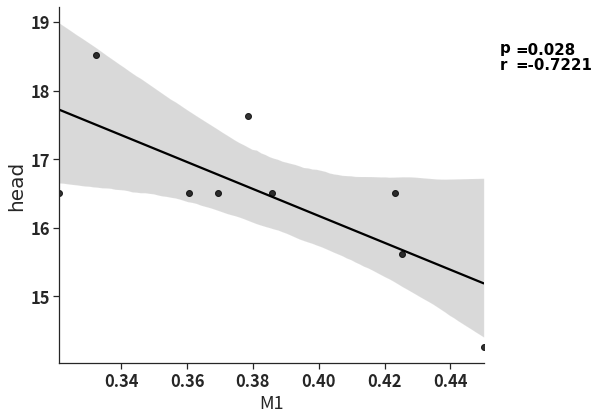

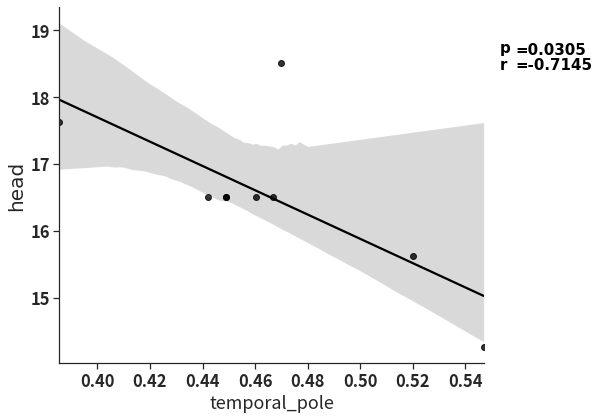

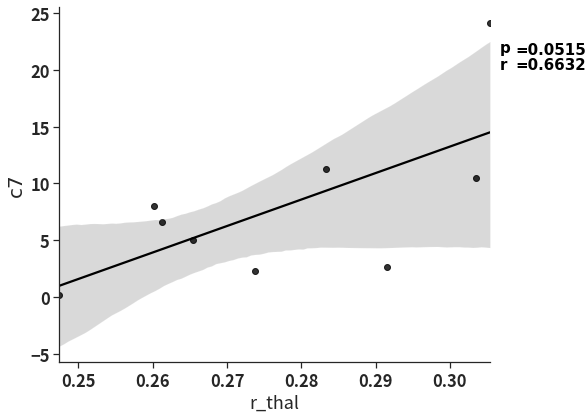

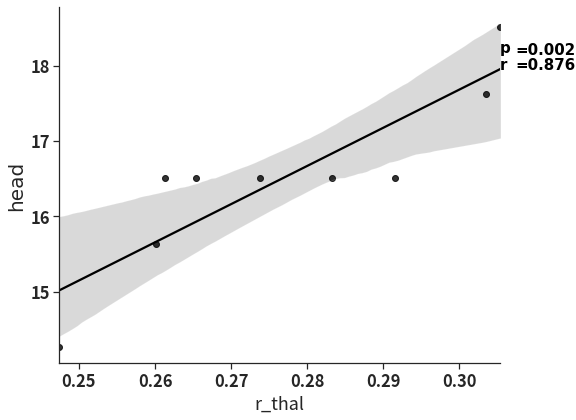

p value of pearson correlation test:


,corticospinal_l,external_capsule_l,retrolenticular_internal_capsule_l,retrolenticular_internal_capsule_r,sma_r,slf_l,slf_r,slf_temporal_l,slf_temporal_r,corticospinal_r,callosalbody,forcepts_minor,BA9,BA44,M1,MTG,temporal_pole,r_thal
c6,0.8897,0.4565,0.9217,0.7086,0.8513,0.8936,0.8793,0.7872,0.9332,0.8313,0.6717,0.6368,0.1968,0.9617,0.4226,0.9920,0.8644,0.8239
c7,0.8738,0.5678,0.3313,0.7088,0.3726,0.9343,0.9499,0.9394,0.9468,0.7501,0.9957,0.5827,0.2378,0.2295,0.1820,0.5357,0.5404,0.0515
c8,0.9573,0.9738,0.8719,0.9765,0.7527,0.9443,0.6737,0.9473,0.8931,0.7623,0.8902,0.9585,0.1527,0.9791,0.3507,0.6584,0.4513,0.5857
head,0.3147,0.1098,0.6836,0.4019,0.2364,0.3084,0.3315,0.2245,0.2702,0.4842,0.2143,0.1114,0.0876,0.1666,0.0280,0.3446,0.0305,0.0020


In [28]:
qst_list = corr.columns[:4]
scale_list = list(corr.columns[4:])
rows = len(qst_list)
cols = len(scale_list)
# Patients' correlation matrix
qst_coefficient_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols),  index=qst_list,columns=scale_list)
qst_p_matrix = pd.DataFrame(np.zeros(rows*cols).reshape(rows,cols), index=qst_list,columns=scale_list)
qst_p_matrix_perm = qst_p_matrix.copy()
qst_norm_matrix = qst_p_matrix.copy()


for scale in scale_list:
    x_label = scale
    for y_label in qst_list:

        df = corr[[x_label, y_label]]
        df = df.dropna(how='any',axis=0) # drop any row with missing value to prevent overfit

        norm_bool = 1 if multivariate_normality(df[[x_label, y_label]])[2] else 0
        qst_norm_matrix.loc[y_label, x_label] = norm_bool

        pccs = stats.pearsonr(df[x_label], df[y_label])
        qst_coefficient_matrix.loc[y_label, x_label] = round(pccs[0],4)
        qst_p_matrix.loc[y_label, x_label] = round(pccs[1],4)

        if pccs[1] < 0.06:

            plt.figure(figsize=(8,6))
            '''decorate image'''
            sns.set(font_scale=1.5)
            sns.set_style("white")
            plt.rcParams["font.weight"] = "bold"
            plt.rcParams["font.family"] = 'Noto Sans CJK JP'

            ax = plt.gca()      #gca='get current axis'
            # 将右边和上边的边框（脊）的颜色去掉
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')

            # 绑定x轴和y轴
            font2 = {'weight' : 'normal','size'   : 20, }
            
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            sns.set(color_codes=True)

            sns.regplot(x=x_label, y=y_label, data=df,color='black')
            plt.ylabel('{}'.format(y_label),font=font2)
            plt.annotate("p\nr", xy=(500, 350), xycoords='figure points',fontsize=15,color="black")

            plt.annotate("={}".format(round(qst_p_matrix.loc[y_label, x_label],4)), 
            xy=(515, 365), xycoords='figure points',fontsize=15,color="black")
            plt.annotate("={}".format(qst_coefficient_matrix.loc[y_label, x_label]), 
            xy=(515, 350), xycoords='figure points',fontsize=15,color="black")
            plt.tight_layout()
            plt.savefig('chart/qst_{}_{}一元线性回归.svg'.format(x_label, y_label))
            plt.show()
print("p value of pearson correlation test:")
qst_p_matrix

<AxesSubplot:>

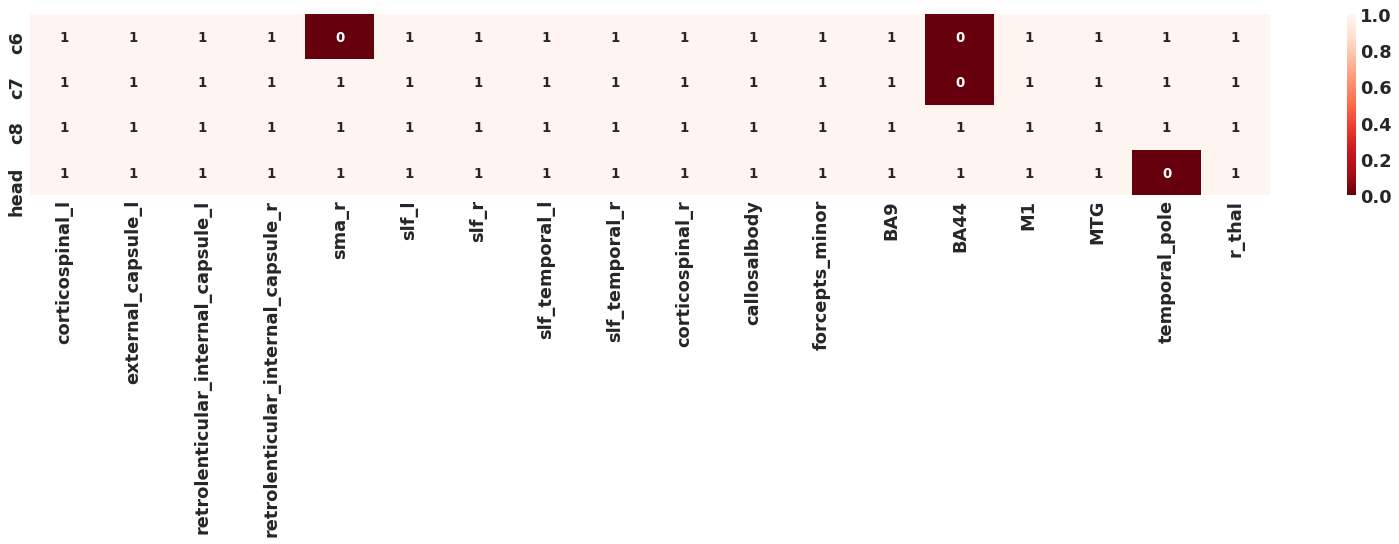

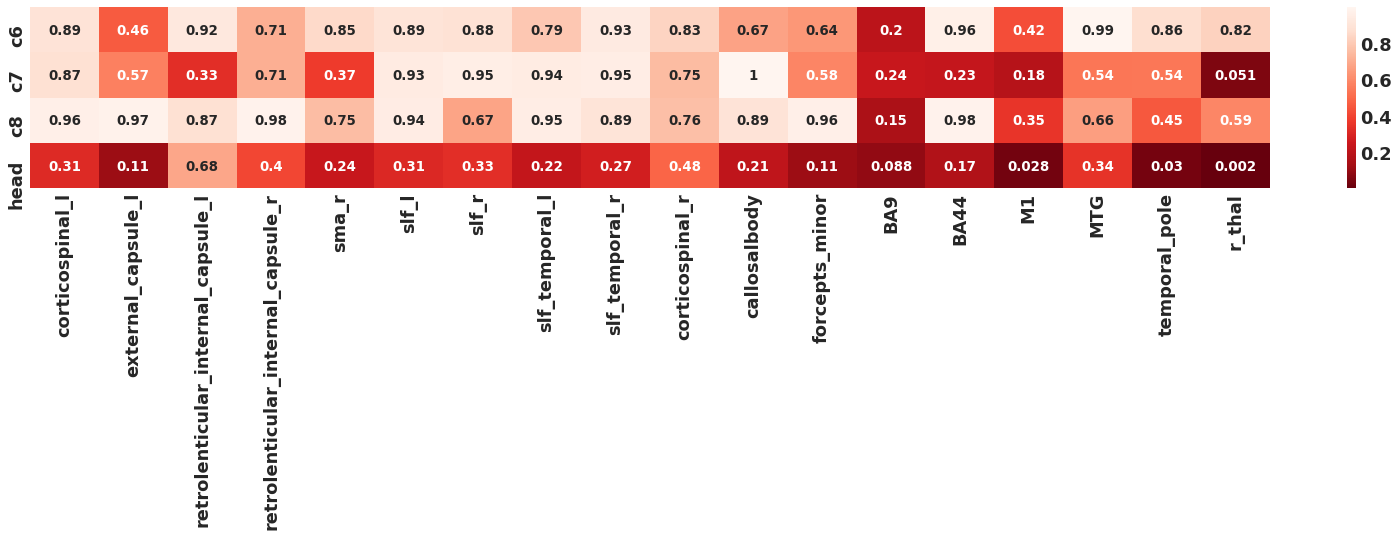

In [29]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large, 'legend.fontsize': med,  'figure.figsize': (16, 10), 'axes.labelsize': med,
          'axes.titlesize': med,   'xtick.labelsize': med,  'ytick.labelsize': med,  'figure.titlesize': large}

plt.figure(figsize=(25,3), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  
sns.heatmap(qst_norm_matrix, cmap='Reds_r', annot=True)

plt.figure(figsize=(25,3), dpi= 80)

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False  

sns.heatmap(qst_p_matrix, cmap='Reds_r', annot=True)


In [30]:
def get_mean(df,col):
    return df.describe().loc['mean',col]

def get_std(df,col):
    return df.describe().loc['std',col]

def get_max(y_old, y_new):
    y = y_old if y_old > y_new else y_new
    return y
    
def get_sig(df,scale):
    sig = df.loc[scale,'p value']
    symbol = ''
    if  0.01 < sig < 0.05:
        symbol = '  *'
    elif 0.001< sig <=0.01:
        symbol = '**'
    elif sig <=0.001:
        symbol = '***'
    elif 0.05 <= sig <0.10:
        symbol = '^'
    return (sig, symbol)


def plot_sig(xstart,xend,ystart,yend,sig):
    x = [xstart,xstart]
    y = [ystart,yend]
    plt.plot(x,y,color="black",linewidth=2)
    
    x = [xstart,xend]
    y = [yend,yend]
    plt.plot(x,y,color="black",linewidth=2)

    x0 = (xstart+xend)/2
    y0=yend
    plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(-15, +1),
                 textcoords='offset points', fontsize=25,color="black")
    x = [xend,xend]
    y = [ystart,yend]
    plt.plot(x,y,color="black",linewidth=2)

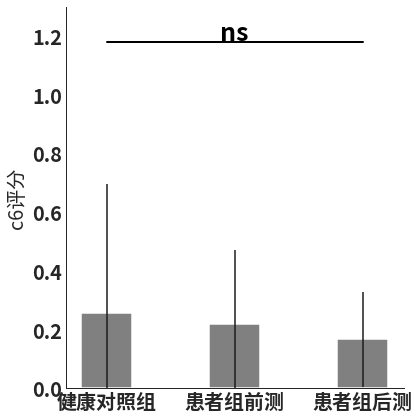

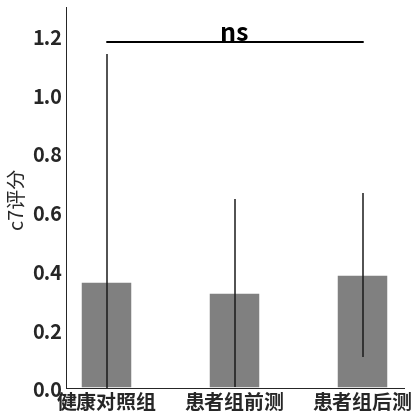

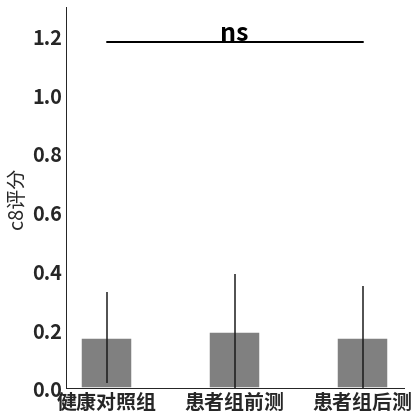

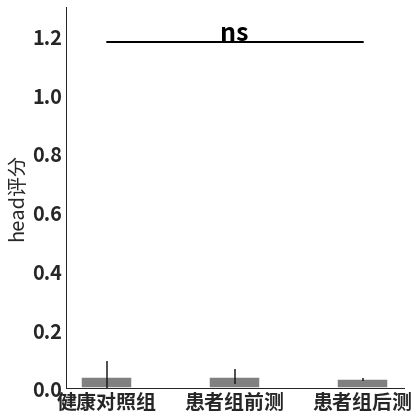

In [38]:
%timeit

for i, scale in enumerate(regions):
    '''parameters setup'''
    size = 3
    x = np.arange(size)
    total_width, n = 0.8, 2
    width = total_width / n
    x = x - (total_width - width) / 2
    labels = ['健康对照组', '患者组前测', '患者组后测']
    '''获取bar图所需值'''
    scale_mean=[get_mean(df, scale) for df in [ct_sens,pt_sens,pt1_sens]]
    scale_std= [get_std(df, scale) for df in [ct_sens,pt_sens,pt1_sens]]
    '''figure setup'''
    plt.figure(figsize=(6,6))
    sns.set_style("white")
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["font.family"] = 'Noto Sans CJK JP'
    plt.bar(x, scale_mean,  width=width, yerr = scale_std, tick_label=labels, linewidth=1.5,label='Control',color='gray')
     
    '''plot trend'''
    y_max = 1

    '''plot significance'''
    marker=True
    # 患者12时点
    symbol = get_sig(a1, scale)[1]
    if symbol:
        plot_sig(1.1,1.5,y_max*1.05,y_max*1.08,symbol);marker=False
    # 健康对时点1
    symbol = get_sig(c1,scale)[1]
    if symbol:
        plot_sig(-0.2,0.8,y_max*1.05,y_max*1.08,symbol);marker=False
    # 健康对时点2
    symbol = get_sig(b1,scale)[1]
    if symbol:
        plot_sig(-0.2,1.8,y_max*1.18,y_max*1.21,symbol);marker=False
    if marker:
        plot_sig(-0.2,1.8,y_max*1.18,y_max*1.18, 'ns')

    '''decorate image'''
    ax = plt.gca()      #gca='get current axis'
    # 将右边和上边的边框（脊）的颜色去掉
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # 绑定x轴和y轴
    
    font2 = {'weight' : 'normal','size'   : 20, }
    plt.ylabel('{}评分'.format(scale),font=font2)
    plt.tick_params(labelsize=20)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.ylim(0, y_max*1.3)
    plt.tight_layout()


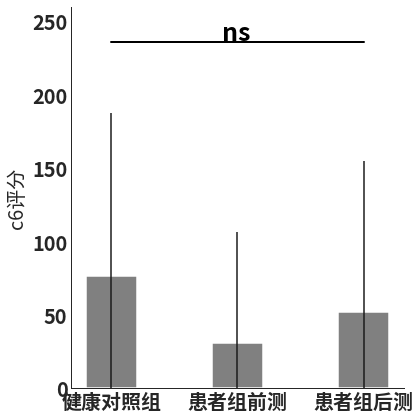

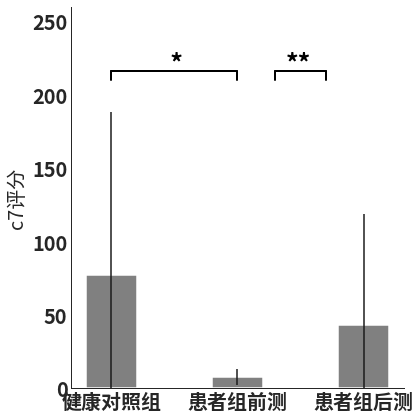

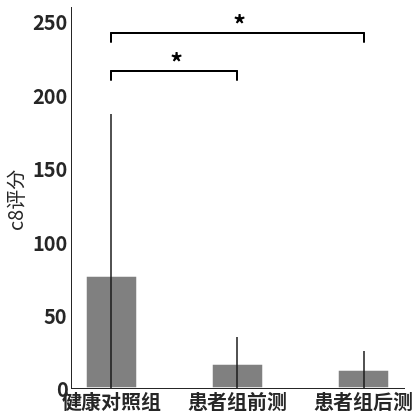

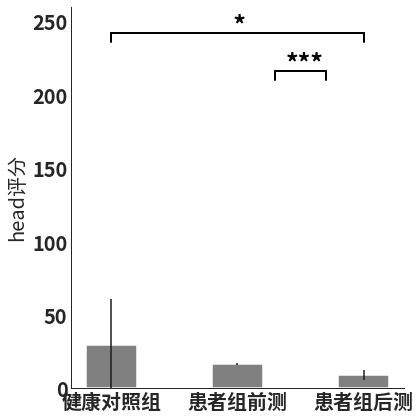

In [44]:
for i, scale in enumerate(regions):
    '''parameters setup'''
    size = 3
    x = np.arange(size)
    total_width, n = 0.8, 2
    width = total_width / n
    x = x - (total_width - width) / 2
    labels = ['健康对照组', '患者组前测', '患者组后测']
    '''获取bar图所需值'''
    scale_mean=[get_mean(df, scale) for df in [ct_pain,pt_pain,pt1_pain]]
    scale_std= [get_std(df, scale) for df in [ct_pain,pt_pain,pt1_pain]]
    '''figure setup'''
    plt.figure(figsize=(6,6))
    sns.set_style("white")
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["font.family"] = 'Noto Sans CJK JP'
    plt.bar(x, scale_mean,  width=width, yerr = scale_std, tick_label=labels, linewidth=1.5,label='Control',color='gray')
     
    '''plot trend'''
    y_max = 200

    '''plot significance'''
    marker=True
    # 患者12时点
    symbol = get_sig(a2, scale)[1]
    if symbol:
        plot_sig(1.1,1.5,y_max*1.05,y_max*1.08,symbol);marker=False
    # 健康对时点1
    symbol = get_sig(c2,scale)[1]
    if symbol:
        plot_sig(-0.2,0.8,y_max*1.05,y_max*1.08,symbol);marker=False
    # 健康对时点2
    symbol = get_sig(b2,scale)[1]
    if symbol:
        plot_sig(-0.2,1.8,y_max*1.18,y_max*1.21,symbol);marker=False
    if marker:
        plot_sig(-0.2,1.8,y_max*1.18,y_max*1.18, 'ns')

    '''decorate image'''
    ax = plt.gca()      #gca='get current axis'
    # 将右边和上边的边框（脊）的颜色去掉
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # 绑定x轴和y轴
    
    font2 = {'weight' : 'normal','size'   : 20, }
    plt.ylabel('{}评分'.format(scale),font=font2)
    plt.tick_params(labelsize=20)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.ylim(0, y_max*1.3)
    plt.tight_layout()